$\Huge\text{Física Computacional}$

# Tema 4: Interpolación y extrapolación.

- Generalmente los experimentos sólo proporcionan un conjunto discreto de datos $(x_i,f_i)$ que representan el valor de una función en un conjunto finito de argumentos $\{x_0,\cdots,x_n\}$.
 
- Si puntos adicionales son necesarios, por ejemplo para representar la función o usarla como argumento de otra, necesitamos interpolar ese conjunto discreto de datos.

- La interpolación es por tanto necesaria para representar una función complicada por una más simple o para poder integrarla  o derivarla. 

- De forma general, dada una muestra de $N+1$ puntos $(x_i , f_i )$ con $i = 0,\cdots N$ y una función de $x$ que depende de $M+1$ parámetros $c_i$

$$\Phi(x;c_0,\cdots,c_M)$$

$\quad$ el problema consiste en encontar el valor de los coeficientes $c_i$ satisfaciendo que:

$$\Phi(x_i;c_0,\cdots,c_M)=f_i,\quad\text{con}\quad i=0,\cdots,N.$$

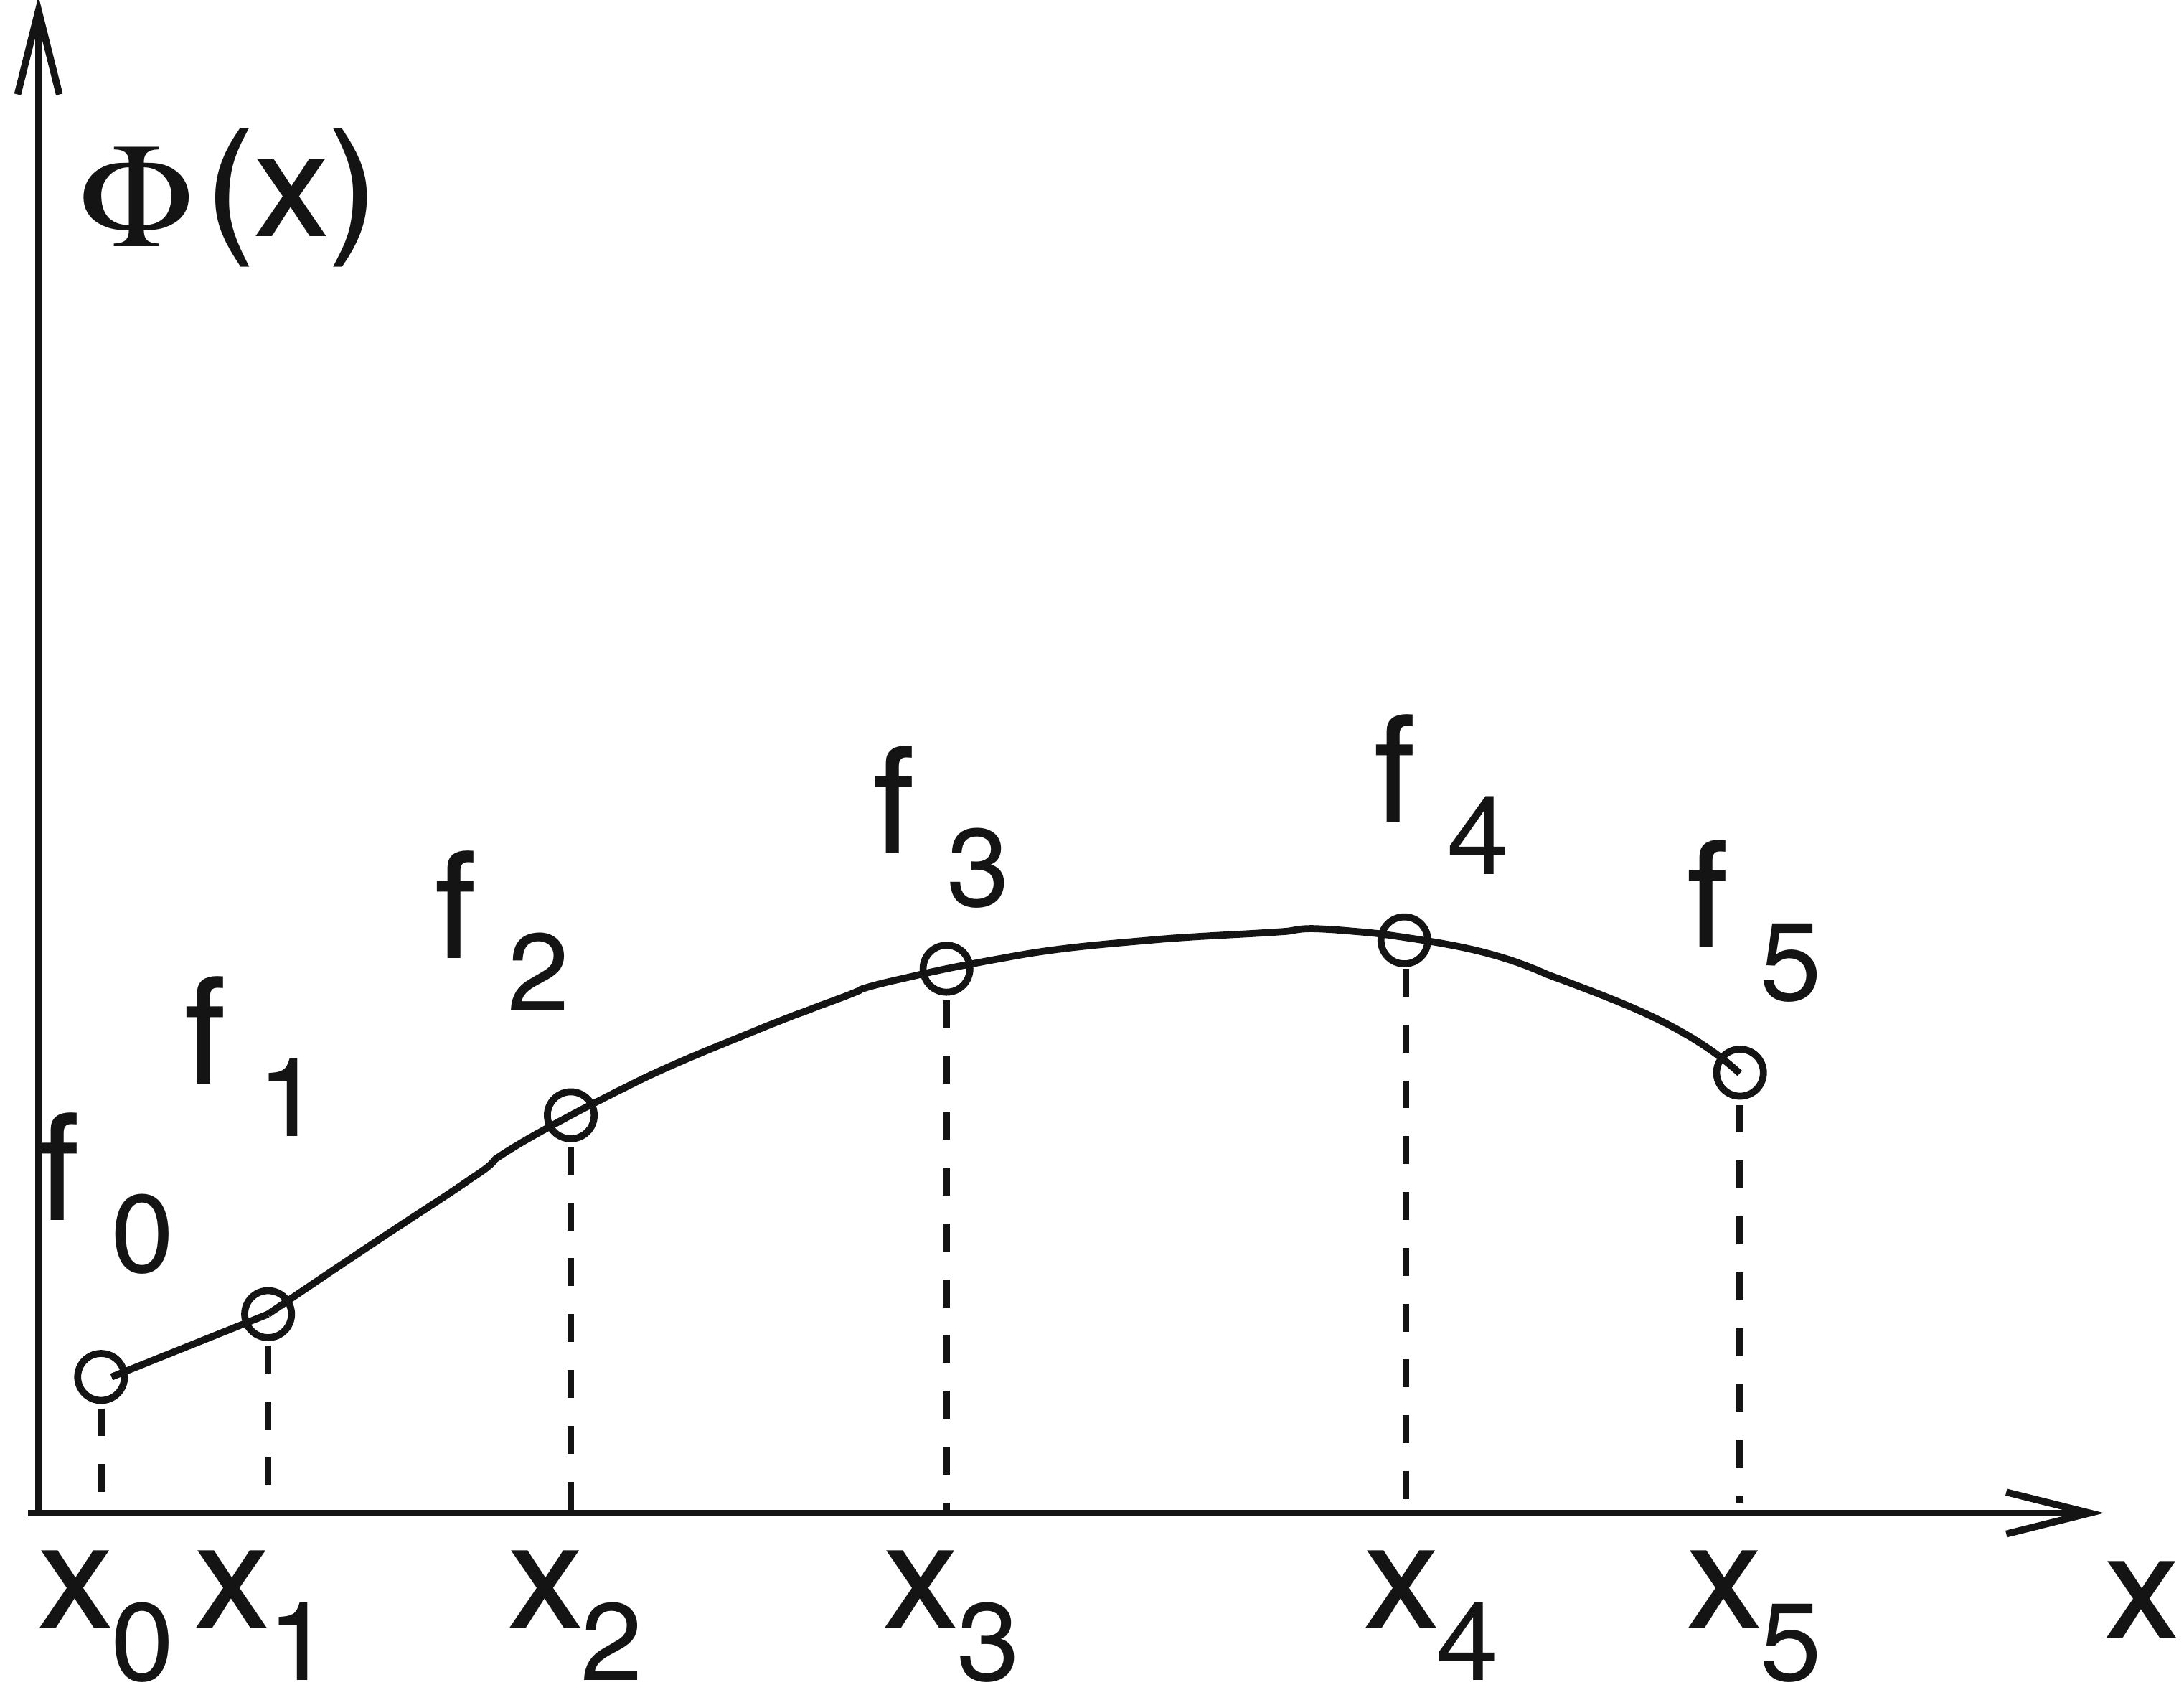

In [2]:
display(Image(filename="int_ex.png", width=600, height=600))

- Si $M>N$, nuestra función (forma funcional) tiene demasiados parámetros.


- Si $M<N$, en general no hay solución a el problema, por lo que uno tiene que aproximar en vez de interpolar.   
  En general se suele hacer por medio del método de los mínimos cuadrados, o del $\chi^2$.   
  Son los problemas de minimización que estudiaremos en el Tema 5. 
  

- Si $M=N$, el problema tiene solución única. Es el llamado problema de interpolación que vamos a estudiar en este Tema.


- Nos vamos a centrar en la interpolación líneal, donde la función $\Phi(x)$ cumple

$$\Phi(x)=\sum_{i=0}^N{c_i\,\Phi_i(x)},$$


- En particular nos centraremos en la interpolaciónpor medio de polinomios, 

$$\Phi(x)=\sum_{i=0}^N{c_i\,x^i(x)},$$


 - Splines cúbicos
 
 $$\Phi(x)=\sum_{i=0}^{N-1}{s_i(x)}\,\Theta(x-x_i)\,\Theta(x_{i+1}-x),\quad\text{con}\quad s_i(x)=\sum_{j=0}^3{c_{ij}(x-x_i)^j}$$
 
- Aproximaciones racionales: aproximantes de Padé 

$$\Phi(x)=\frac{\displaystyle\sum_{i=0}^{n_1}{c_i\,x^i}}{\displaystyle\sum_{i=0}^{n_2}{d_i\,x^i}},\quad\text{con}\quad n_1+n_2=N-1$$

- La interpolación trigonométrica, el análisis de Fourier, 

$$\Phi(x)=\sum_{n=0}^N{c_i\,e^{\,i\,n\,x}},$$

$\quad$  será estudiado en el Tema 6. 

## 4.1 Interpolación polinómica.

### 4.1.1 Interpolando dos puntos.

- Asumamos que conocemos la función $f(x)$ en sólo dos puntos $a$ y $b$ y que necesitamos evaluarla en un punto entre medias. 
- Hay infinitas formas de hacerlo, pero la más sencilla es asumir que la curva que las conecta es una línea recta.

$$f(x)\simeq p_l(x)=f(a)+\frac{f(b)-f(a)}{b-a}(x-a),$$

$\quad$ es la interpolación líneal. 

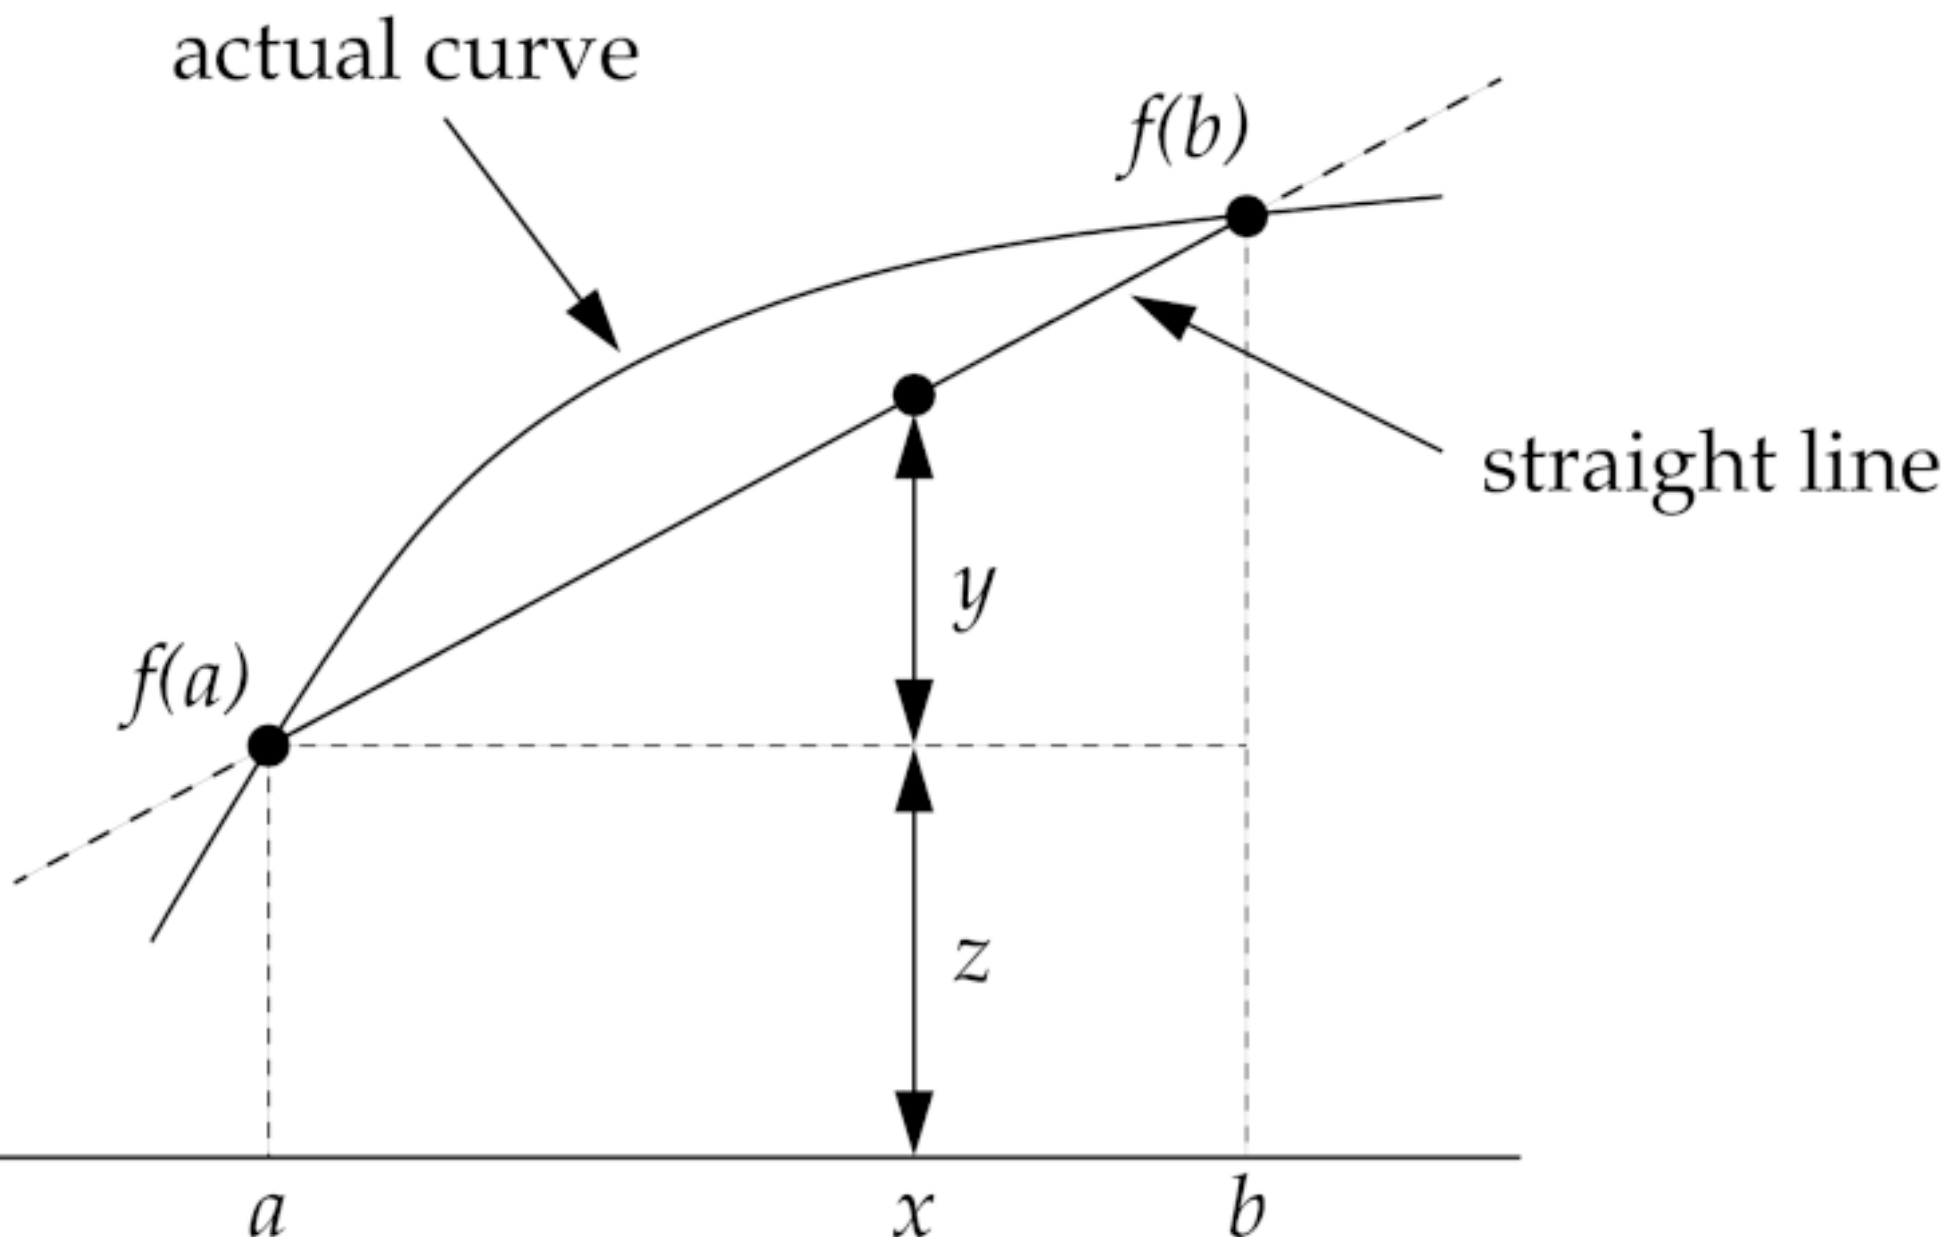

In [1]:
from IPython.display import Image,display
display(Image(filename="int_lin.png", width=600, height=600))

- Una vez asumida la forma funcional de la curva, esta puede ser usada fuera del intervalo $[a,b]$, es decir, puede ser extrapolada. 

- Por supuesto, cuanto más lejos uno se separa del intervalo más error tendrá asociado la extraplación. 

#### Error en la interpolación líneal

- Para analizar cuan bien estamos describiendo la curva tanto dentro como fuera del intervalo inicial, expandamos el valor de la función en $a$ y $b$ en serie Taylor.

$$f(a)=f(x)+(x-a) f'(x)+\frac{1}{2}(x-a)^2 f''(x)+{\cal O}(x-a)^3,$$

$$f(b)=f(x)+(b-x) f'(x)+\frac{1}{2}(b-x)^2 f''(x)+{\cal O}(b-x)^3,$$

- Introduciendo ambas expansiones en la formula de la interpolación líneal:

$$f(x)=p(x)_l+(x-a)(x-b)f''(x)+\cdots$$

$\quad$ tomando $b-a=h$, el error esta por tanto acotado por

$$\epsilon<\frac{h^2}{4}\vert f''(x)\vert.$$

### 4.1.2: Interpolación polinómica de grado arbitrario.

- Ya vimos en el Tema 3 que el polinomio de Lagrange 

$$L(x,f)=\sum_{i=1}^N f(x_i)\,l_i(x)=\sum_{i=1}^N f(x_i)\,\prod_{\begin{array}{c}j=1\\[-4pt]j\neq i\end{array}}^N{\frac{x-x_j}{x_i-x_j}},$$ 
 

$\quad$ es el único polinomio de orden $N-1$ que interpola (coincide con) la función $f$ en los puntos $x_i$ con $i=1,\cdots,N$. 

- El problema reside en que obtener L(x,f) requiere realizar ${\cal O}(N^2)$ operaciones. 

- Definiendo el polinomio:

$$\omega(x)=\prod_{i=1}^N (x-x_i),$$

$\quad$ la base de polinomios de Lagrange puede escribirse como:

$$l_i(x)=\frac{\omega(x)}{x-x_i}\frac{1}{\prod_{\begin{array}{c}j=1\\[-4pt] j\neq i\end{array}}^N (x_i-x_j)}=\omega(x)\frac{u_i}{x-x_i},$$

$\quad$ donde 

$$u_i=\prod_{\begin{array}{c}j=1\\[-4pt] j\neq i\end{array}}^N \frac{1}{(x_i-x_j)}$$

$\quad$ son los llamados pesos bariocéntricos, que al ser independientes de x, pueden calcularse sólo una vez.

- De esta forma, el interpolador de Lagrange puede escribirse como

$$L(x,f)=\omega(x)\sum_{i=1}^N f(x_i)\,\frac{u_i}{x-x_i},$$ 

$\quad$ que aún involucra ${\cal O}(N^2)$ operaciones. Sin embargo, interpolando f(x)=1, se obtiene:

$$L(x,1)=\omega(x)\sum_{i=1}^N \,\frac{u_i}{x-x_i},$$ 

$\quad$ y por tanto:

$$L(x,f)=\frac{L(x,f)}{L(x,1)}=\frac{\displaystyle\sum_{i=1}^N f(x_i)\,\frac{u_i}{x-x_i}}{\displaystyle\sum_{i=1}^N \,\frac{u_i}{x-x_i}},$$

$\quad$ que permite obtener la función de interpolación con sólo $N$ operaciones.

#### Fenómeno de Runge.

- Uno puede pensar que al aumentar el grado del polinomio la precisión de la interpolación aumenta. 
- Sin embargo, no es el caso: un polinomio de grado alto involucra grandes fluctuaciones que se amplifican en los extremos del intervalo.

**Ejercicio 4.1:** Estudiar la interpolación polinómica de la función de Runge:

$$f(x)=\frac{1}{1+25 x^2}$$

en el intervalo [-1,1] usando polinomios de grado $N=10,\cdots,15.$

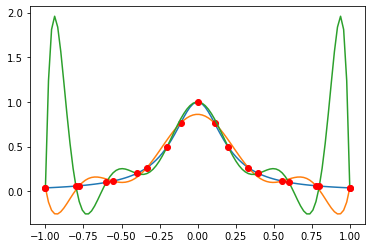

In [4]:
from numpy import linspace
from numpy.polynomial import Polynomial 
from matplotlib.pyplot import plot,show

# Definimos nuestra función de runge

def runge_function(x):
    return 1/(1+25*x**2)

# Creamos los pesos bariocéntricos

def runge_u(N):
    xp=linspace(-1,1,N)  
    
    uu=[1 for i in range(N)]
    
    for i in range(N):
        for j in [z for z in range(N) if z != i]:
            uu[i]/=(xp[i]-xp[j])
    return uu

# Creamos nuestra función de interpolación polinómica de runge

def runge_interpol(x,uu,N):
    
    xp=linspace(-1,1,N)    
    LN=0
    LD=0
    
    for i in range(N):
        if (x==xp[i]):
            return runge_function(xp[i])
            break
        
        LN+=runge_function(xp[i])*uu[i]/(x-xp[i])    
        LD+=uu[i]/(x-xp[i])

    return LN/LD

# Comprobamos nuestra función, y su interpolación polinomica en 100 puntos
    
x=linspace(-1,1,100)
plot(x,runge_function(x))

for k in range(10,12):
    
    # calculamos los pesos bariocéntricos para un valor de N    
    uu=runge_u(k)

    # Para un valor de N (k) dado
    # calculamos todos los puntos de la interpolación para los 100 puntos            

    p=[runge_interpol(i,uu,k) for i in x]
    plot(x,p)
    
    # finalmente representamos como punto rojos los k puntos
    # donde la función de interpolación coincide con la función de runge
    
    xp=linspace(-1,1,k)
    plot(xp,runge_function(xp),"ro")

show()

**Que ocurre con la extrapolación?**

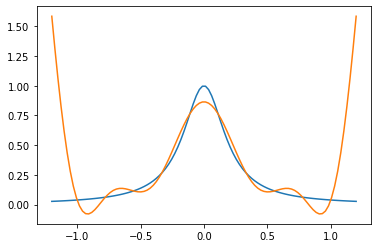

In [6]:
xpoints=linspace(-1.2,1.2,100)
plot(xpoints,runge_function(xpoints))

x=linspace(-1.2,1.2,100)
for k in range(10,11):
    p=[runge_interpol(i,uu,k) for i in x]
    plot(x,p)
show()

* El error de la extrapolación polinómica incrementa dramáticamente cuando uno se aleja del intervalo!

## 4.2: Splines

- La interpolación polinómica funciona bien para intervalos pequeños, polinomios de grado bajo. 
- Sin embargo no funciona bien en intervalos grandes (para un gran número de puntos) y un grado alto.


- Los splines hacen uso de este hecho:
<br/>

    - Para cada uno de los sub intervalos definidos por los puntos en los que conocemos la función.
    - Usamos un polinomio de grado bajo para interpolar esos dos puntos. 
    
<br/>    
    
- Es decir, representan un ajuste de la curva inicial "a trozos" (piecewise) por medio de polinomios.    
    
- El caso más sencillo es un spline lineal:

$$f(x)\simeq s_i(x)\quad \text{siendo}\quad s_i(x)=f(x_i)+\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}(x-x_i)\quad\text{con}\quad x_i\le x< x_{i+1}.$$

- Sin embargo, el caso más habitual (y el que en general funciona mejor) es el spline cúbico:

$$f(x)\simeq s_i(x)\quad \text{siendo}\quad s_i(x)=\sum_{j=0}^3{a_{ij}\,(x-x_i)^j}\quad\text{con}\quad x_i\le x< x_{i+1}$$


- Si conocemos la función en $N+1$ puntos, necesitamos construir un polinomio de orden 3 en $N$ intervalos.

- Por tanto, necesitamos fijar 4 N grados de libertad.

    1. Conocemos la funcion en $N+1$ puntos. 
    2. Los diferentes polinomios deben ser continuos, y tener una primera y segunda derivada continua en los puntos intermedios. Es decir:
    
    \begin{align}
        s_i(x_{i+1})=&s_{i+1}(x_{i+1}),\quad\forall i\in \{1,N-1\},\nonumber\\
        s'_i(x_{i+1})=&s'_{i+1}(x_{i+1}),\quad\forall i\in \{1,N-1\},\nonumber\\
        s''_i(x_{i+1})=&s''_{i+1}(x_{i+1}),\quad\forall i\in \{1,N-1\},\nonumber\\
    \end{align}
    
    que implican $N+1+3(N-1)=4N-2$ condiciones.
<br/>    
    
    3. Faltan dos grados de libertar por determinar que se suelen fijar imponiendo condiciones de contorno (condiciones para el punto inicial y final):
<br/>    
    
        - Condiciones naturales: $\,\;s''_1(x_1)=s''_{n-1}(x_n)=0$.
        - Condiciones periodicas: $\,s'_1(x_1)=s'_{n-1}(x_n)$ y $s''_1(x_1)=s''_{n-1}(x_n)$.
        - Valores de frontera:     $\;\;\quad s'_1(x_1)=r_1$, y  $s'_{n-1}(x_n)=r2$.
        
        
### 4.2.1 Algoritmo para determinar los coeficientes de un spline cúbico.
        
- La segunda derivada del spline es una función lineal:

    $$s''_i(x)=2\,a_{i2}+6\,a_{i3}\,(x-x_i),$$
    
$\quad$  por tanto, teniendo en cuenta que  $s''_i(x_i)=2\,a_{i2}$, podemos escribir:

$$s''_i(x)=s''_i(x_i)+6\,a_{i3}\,(x-x_i),$$

- Por otro lado, la ecuación de continuidad para la segunda derivada implica:

$$ s''_i(x_{i+1})=s_i''(x_i)+6\,a_{i3}\,(x_{i+1}-x_{i})=s_{i+1}''(x_{i+1}),\quad\Rightarrow\quad 6\,a_{i3}=\frac{s_{i+1}''(x_{i+1})-s_{i}''(x_{i})}{x_{i+1}-x_i},$$

$\quad$ y por tanto:

\begin{align}
s''_i(x)\,=&\,s''_i(x_i)+\frac{s_{i+1}''(x_{i+1})-s_{i}''(x_{i})}{x_{i+1}-x_i}\,(x-x_i)\nonumber\\
        =&\,s''_{i+1}(x_{i+1})\,\frac{x-x_i}{x_{i+1}-x_i}+s''_i(x_i)\,\frac{x_{i+1}-x}{x_{i+1}-x_i},
\end{align}

* Si hacemos la integral indefinida de $s''_i(x)$ con respecto a x obtenemos:

\begin{align}
s'_i(x)\,=&\,s''_{i+1}(x_{i+1})\,\frac{\left(x-x_i\right)^2}{2\left(x_{i+1}-x_i\right)}-s''_i(x_i)\,\frac{\left(x_{i+1}-x\right)^2}{2\left(x_{i+1}-x_i\right)}+\alpha_i,\nonumber\\
s_i(x)\,=&\,s''_{i+1}(x_{i+1})\,\frac{\left(x-x_i\right)^3}{6\left(x_{i+1}-x_i\right)}+s''_i(x_i)\,\frac{\left(x_{i+1}-x\right)^3}{6\left(x_{i+1}-x_i\right)}+\alpha_i \left(x-x_i\right)+\beta_i,\nonumber\\
\end{align}

* Sin embargo, teniendo en cuenta las condiciones de la interpolación, $s_i(x_i)=f(x_i)$ y $s_i(x_{i+1})=f(x_{i+1})$ tenemos que

\begin{align}
s_i(x_i)=&\,\frac{1}{6}s''_i(x_i)\,\left(x_{i+1}-x\right)^2+\beta_i=f(x_i)\nonumber\\
s_i(x_{i+1})=&\,\frac{1}{6}s''_{i+1}(x_{i+1})\,\left(x_{i+1}-x\right)^2+\alpha_i\,\left(x_{i+1}-x_i\right)+\beta_i=f(x_{i+1}),\nonumber
\end{align}

$\quad$ y por tanto:

\begin{align}
\beta_i\,=&\,f(x_i)-\frac{1}{6}s''_i(x_i)\,\left(x_{i+1}-x\right)^2,\nonumber\\
\alpha_i\,=&\,\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}-\frac{x_{i+1}-x_i}{6}\left(s''_{i+1}(x_{i+1})-s''_i(x_i)\right).
\end{align}

- Comparando con la definición incial de nuestro spline:

$$s_i(x)=\sum_{j=0}^3{a_{ij}\,(x-x_i)^j},$$

$\quad$ obtenemos por tanto que:

\begin{align}
a_{i0}\,=&\,f(x_i),\nonumber\\
a_{i1}\,=&\,\frac{f(x_{i+1})-f_(x_i)}{x_{i+1}-x_i}-\frac{x_{i+1}-x_i}{6}\left(s''_{i+1}(x_{i+1})+2s''_i(x_i)\right),\nonumber\\
a_{i2}\,=&\,\frac{s''_i(x_i)}{2},\\
a_{i3}\,=&\,\frac{s''_{i+1}(x_{i+1})-s''_i(x_i)}{6\left(x_{i+1}-x_i\right)}.
\end{align}

- Sólo nos queda determinar el valor de las segundas derivadas de los splines $s''_{i}(x_i)$.  
  Cosa que podemos hacer explotando la única condición de continuidad que nos queda por usar: $s_{i-1}'(x_i)=s_i'(x_i)$.
    
\begin{align}
s'_{i-1}(x_i)=&\frac{1}{2}s''_i(x_i)\left(x_{i}-x_{i-1}\right)+\frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}-\frac{x_i-x_{i-1}}{6}\left(s''_{i}(x_i)-s''_{i-1}(x_{i-1}) \right)\nonumber\\
             =&-\frac{1}{2}s''_i(x_i)\left(x_{i+1}-x_{i}\right)+\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}-\frac{x_{i+1}-x_{i}}{6}\left(s''_{i+1}(x_{i+1})-s''_{i}(x_{i})\right)=s'_i(x_i),\nonumber
\end{align}
  
$\quad$ que nos permite encontrar la relación:

$$\frac{1}{6}s''_{i-1}(x_{i-1})\,(x_{i}-x_{i-1})+\frac{1}{3}s''_{i}(x_{i})\,(x_{i+1}-x_{i-1})+\frac{1}{6}s''_{i+1}(x_{i+1})\,(x_{i+1}-x_{i})=\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}-\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}},$$

$\quad$ que proporciona un sistema lineal de ecuaciones para obtener $s_i''(x_i)$.

- Llamando:

\begin{align}
\mu_i=&\frac{x_{i+1}-x_{i}}{x_{i+1}-x_{i-1}},\nonumber\\
\nu_i=&\frac{x_{i}-x_{i-1}}{x_{i+1}-x_{i-1}},\nonumber\\
\lambda_i=&\frac{6}{x_{i+1}-x_{i-1}}\left(\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}-\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}\right),
\end{align}

- el sistema de ecuaciones se simplifica a

$$\nu_i\,s''_{i-1}(x_{i-1}) + 2\,s''_{i}(x_{i})+\mu_i\,s''_{i+1}(x_{i+1})=\lambda_i,\quad\text{con}\quad i=1,\cdots,n-1$$

- Aplicando condiciones de contorno naturales uno encuentra que:

$$\mu_0=0,\quad\nu_n=0,\quad\lambda_0=\lambda_n=0,$$

$\quad$ que implica escribir el sistema de ecuaciones

\begin{equation} 
\left(\begin{array}{ccccc}
2    & 0    &       &         &         &    \\
\nu_1&  2   &\mu_1  &         &         &    \\
     & \nu_2&  2    &\mu_2    &         &    \\
     &      & \ddots&\ddots   &\ddots   &    \\
     &      &       &\nu_{n-1}&2        &\mu_{n-1}\\
     &      &       &         & 0       & 2     
     \end{array}    
\right)\left(
\begin{array}{c}
0\\
s_1''(x_1)\\
s_2''(x_2)\\
\vdots\\
s_{n-1}''(x_{n-1})\\
0\\
\end{array}
\right)=
\left(
\begin{array}{c}
0\\
\lambda_1\\
\lambda_2\\
\vdots\\
\lambda_{n-1}\\
0\\
\end{array}
\right)
\end{equation}

$\quad$ que aprenderemos a resolver en  tema 5.  

**Ejericio 4.2:** Estudiar la interpolación por medio de splines cúbicos de la función de Runge:

$$f(x)=\frac{1}{1+25 x^2}$$

en el intervalo [-1,1] usando $N=10,\cdots,15$ intervalos ($N+1$  puntos). 

**Ayuda:** para resolver el sistema de ecuaciones para las derivadas segundas tener en cuenta que el módulo linalg del páquete numpy incluye la función inv, que calcula la inversa de una matriz.

In [7]:
from numpy import linspace,zeros,dot
from numpy.linalg import inv

def spline_runge(x,N):

    xp=linspace(-1,1,N+1)
    fp=runge_function(xp)

    # 1- extraemos las derivadas segundas de nuestro problema con condiciones de contorno naturales

    # Inicializamos todas las matrices para el problema

    mu=zeros([N+1],float)     # matriz mu (realmente un vector)
    nu=zeros([N+1],float)     # matriz nu
    lan=zeros([N+1],float)    # matriz lan
    M=zeros([N+1,N+1],float)  # matriz que tenemos que invertir (esto si es una matriz)
    s2=zeros([N+1],float)     # matriz de derivadas segundas  

    for i in range(1,N):
        mu[i]=(xp[i+1]-xp[i])/(xp[i+1]-xp[i-1])
        nu[i]=(xp[i]-xp[i-1])/(xp[i+1]-xp[i-1])
        lan[i]=6/(xp[i+1]-xp[i-1])*((fp[i+1]-fp[i])/(xp[i+1]-xp[i])-(fp[i]-fp[i-1])/(xp[i]-xp[i-1]))

        # Definimos nuestra matrix M
    
        M[i,i-1]=mu[i]
        M[i,i]=2
        M[i,i+1]=nu[i]

    # nos falta darle valor a el primer y último elemento (en realidad no es necesario)
    
    M[0,0]=2
    M[N,N]=2

    # Resolvemos el sistema y obtenemos las derivadas segundas

    s2=dot(inv(M),lan)

    # Inicializamos los coeficientes de nuestros splines

    A0 = zeros([N],float) 
    A1 = zeros([N],float) 
    A2 = zeros([N],float) 
    A3 = zeros([N],float) 

    # Les damos su valor

    for i in range(N):
    
        A0[i] = fp[i]
        A1[i] = (fp[i+1]-fp[i])/(xp[i+1]-xp[i])-(xp[i+1]-xp[i])*(s2[i+1]+2*s2[i])/6
        A2[i] = s2[i]/2
        A3[i] = (s2[i+1]- s2[i])/(xp[i+1]-xp[i])/6
    
    # finalmente construimos nuestro polinomio

    i=0
    while x>xp[i+1]:
        i+=1
    
    return A0[i]+A1[i]*(x-xp[i])+A2[i]*(x-xp[i])**2+A3[i]*(x-xp[i])**3

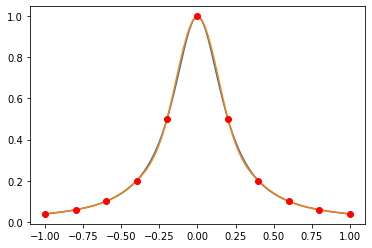

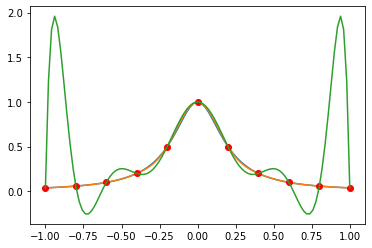

In [9]:
from matplotlib.pyplot import plot,show

x=linspace(-1,1,100)
f=runge_function(x)
xp=linspace(-1,1,11)
fp=runge_function(xp)
fpol=[runge_interpol(a,uu,11) for a in x]
fs=[spline_runge(a,10) for a in x]

plot(x,f)
plot(x,fs)
plot(xp,fp,"ro")
show()

plot(x,f)
plot(x,fs)
plot(xp,fp,"ro")
plot(x,fpol)
show()

## 4.3:  Aproximaciones racionales: aproximantes de Padé 

- Las aproximaciones racionales permite describir correctamente funciones con polos. 
- También son mucho más estables que los polinomios de grados altos.


- En particular, un aproximantes de Padé de orden $[M/N]$ de una función $f(x)$ se definen como:

$$P_{M/N}(x)=\frac{R_M(x)}{Q_N(x)}=\frac{\sum_{i=0}^M r_i\, x^i}{\sum_{i=0}^N q_i\, x^i},$$

$\quad$ donde el valor de los coeficientes $r_i$, $q_i$ están constreñidos a satisfacer la serie de Taylor de $f(x)$ a ${\cal O}(x^{N+M+1})$, es decir:

$$\left.\frac{\text{d}^n f(x)}{\text{d} x^n}\right\vert_{x=0} = \left.\frac{\text{d}^n P_{M/N}(x)}{\text{d} x^n}\right\vert_{x=0},\quad\text{con}\quad n =0,\cdots N+M.$$

- Multiplicando $Q_N(x)\times P_{N/M}$ estas ligaduras implican que:

\begin{align}
r_0 = &q_0\,f(0),\nonumber\\
r_1 =& q_0\,f'(0)+q_1\,f(0)\nonumber\\
\vdots\quad& \qquad\quad \vdots\nonumber\\
r_i =& \sum_{k=0}^i q_{k}\,f^{\,(i-k)\,}(0)\nonumber\\
\vdots\quad& \qquad\quad \vdots\nonumber\\
r_M =& \sum_{k=0}^M q_{k}\,f^{\,(M-k)\,}(0)\nonumber\\
0 =& \sum_{k=0}^{N} q_{k}\,f^{\,(M+1-k)\,}(0)\nonumber\\
\vdots\quad& \qquad\quad \vdots\nonumber\\
0 =& \sum_{k=0}^{N} q_{k}\,f^{\,(M+N-k)\,}(0)\nonumber\\
\end{align}

$\quad$ donde 

$$q_j=0,\;\;\forall\;j>N\quad\text{y}\quad f^{(k)}=0,\;\;\forall\;k<0$$


**Ejemplo 4.1:** Usar el aproximante de Padé $[3/3]$ de la $\tan(x)$ en el intervalo $[0,\pi]$.

- La serie de Taylor de $\tan(x)=x+\frac{1}{3}x^3+ \frac{2}{15} x^5+{\cal O}(x^7)$ en el intervalo $[0,\pi]$.

- Usando las reglas de recurrencia:

\begin{align}
x^0:\quad r_0=&0,\nonumber\\
x^1:\quad r_1=&1,\nonumber\\
x^2:\quad r_2=&q_1,\nonumber\\
x^3:\quad r_3=&q_2+\frac{1}{3},\nonumber\\
x^4:\quad   0=&q_3+\frac{1}{3}q_1,\nonumber\\
x^5:\quad   0=&\frac{2}{15}+\frac{1}{13}q_2,\nonumber\\
x^6:\quad   0=&\frac{2}{15}q_1+\frac{1}{13}q_3,\nonumber\\
\end{align}

$\quad$ que implican que: $r_0=r_2=q_1=q_3=0$, $r_3=-\frac{1}{15}$, y $q_2=-\frac{2}{5}$.

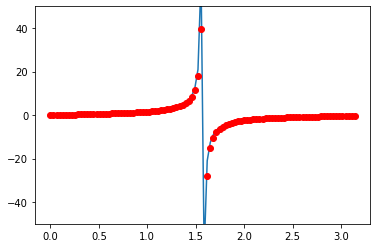

In [10]:
from numpy import linspace,tan,pi
from matplotlib.pyplot import plot,show,ylim

x=linspace(0,pi,100)
plot(x,tan(x))
plot(x,(x-1/15*x**3)/(1-2/5*x**2),"ro")
ylim(-50,50)
show()

**Fin de la clase del 20/10/21**

**Final del Tema 4**